In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
from tqdm import tqdm

## Dataset Read Options

In [2]:
header = ['user_id', 'item_id', 'rating', 'timestamp']
dataset: pd.DataFrame = pd.read_csv('ml-100k/u.data', sep='\t', names=header)
dataset

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [3]:
dataset["timestamp"] = pd.to_datetime(dataset["timestamp"], unit="s")

In [4]:
dataset["rating_year"] = dataset.timestamp.apply(lambda x: x.year)

In [5]:
dataset

,user_id,item_id,rating,timestamp,rating_year
0,196,242,3,1997-12-04 15:55:49,1997
1,186,302,3,1998-04-04 19:22:22,1998
2,22,377,1,1997-11-07 07:18:36,1997
3,244,51,2,1997-11-27 05:02:03,1997
4,166,346,1,1998-02-02 05:33:16,1998
...,...,...,...,...,...
99995,880,476,3,1997-11-22 05:10:44,1997
99996,716,204,5,1997-11-17 19:39:03,1997
99997,276,1090,1,1997-09-20 22:49:55,1997
99998,13,225,2,1997-12-17 22:52:36,1997


In [6]:
header_movie_info = ['movie id', 'movie title', 'release date', 'video release date',
                     'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation',
                     "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                     'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
                     'Thriller', 'War', 'Western']
movie_info_dataset: pd.DataFrame = pd.read_csv('ml-100k/u.item', sep='|', names=header_movie_info, encoding='latin-1')

In [7]:
movie_info_dataset

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
movie_info_dataset["release date"] = pd.to_datetime(movie_info_dataset["release date"], dayfirst=True)
movie_info_dataset

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),1998-02-06,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),1998-02-06,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),1998-01-01,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),1994-01-01,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
movie_info_dataset["release year"] = movie_info_dataset["release date"].apply(lambda x: x.year)
movie_info_dataset

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,Toy Story (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1995.0
1,2,GoldenEye (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
2,3,Four Rooms (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
3,4,Get Shorty (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995.0
4,5,Copycat (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),1998-02-06,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998.0
1678,1679,B. Monkey (1998),1998-02-06,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1998.0
1679,1680,Sliding Doors (1998),1998-01-01,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1998.0
1680,1681,You So Crazy (1994),1994-01-01,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1994.0


In [10]:
yearly_grouped = movie_info_dataset.groupby("release year")

## Visualizations & Analysis

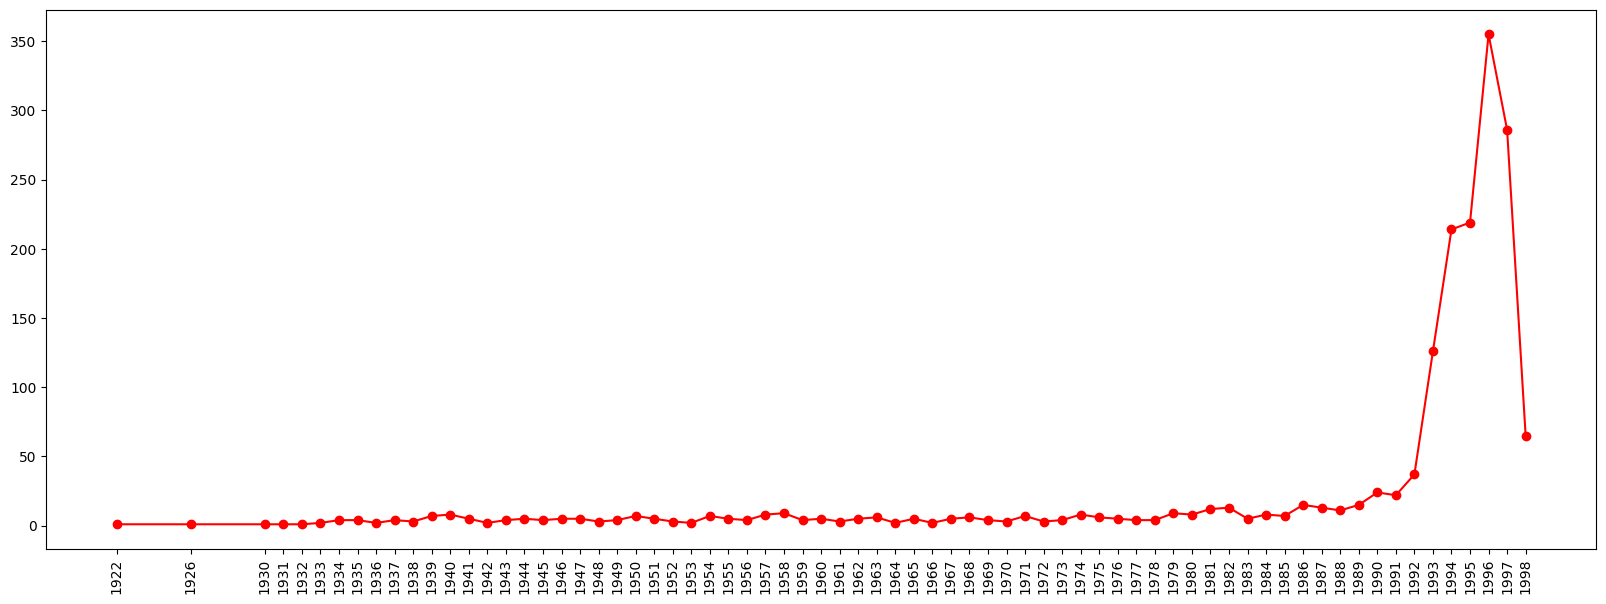

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 7))
plt.plot(yearly_grouped["release year"].first(), yearly_grouped["movie id"].nunique(), "r-o")
plt.xticks(rotation=90, ticks=yearly_grouped["release year"].first())
plt.show()

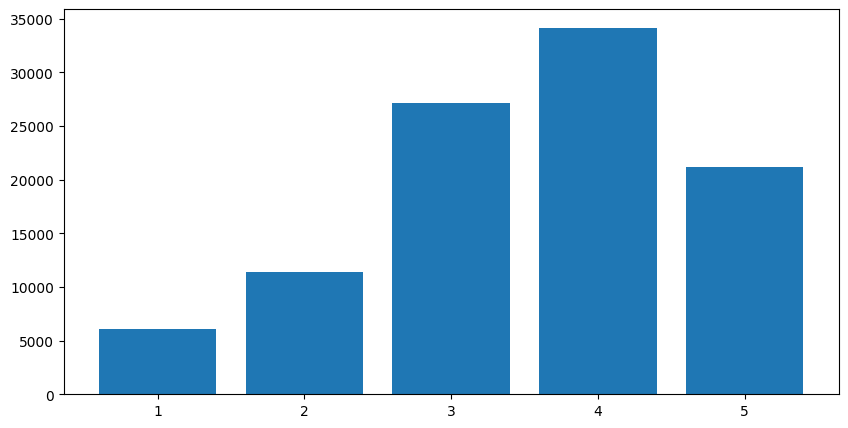

In [12]:
rating_grouped = dataset.groupby("rating")
plt.figure(figsize=(10, 5))
plt.bar(rating_grouped.rating.first(), rating_grouped.rating.count())
plt.show()

In [13]:
genres_by_year = {}
for title in header_movie_info[5:]:
    for key in yearly_grouped.groups.keys():
        genre_count = yearly_grouped.get_group(key)[title][yearly_grouped.get_group(key)[title] == 1].count()
        if title not in genres_by_year.keys():
            genres_by_year[title] = {}
        genres_by_year[title][key] = genre_count

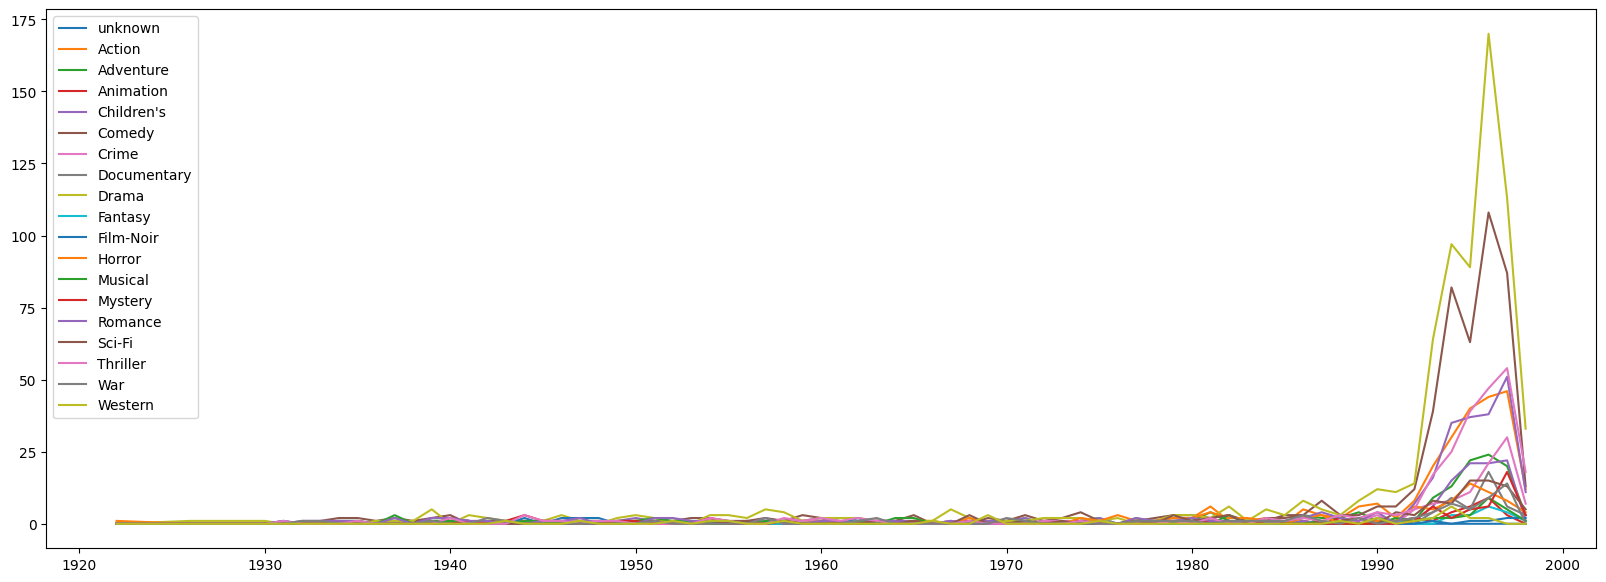

In [14]:
plt.figure(figsize=(20, 7))
for key in genres_by_year.keys():
    plt.plot(genres_by_year[key].keys(), genres_by_year[key].values(), label=key)
plt.legend()
plt.show()

In [15]:
import re

titles = movie_info_dataset["movie title"].apply(lambda x: re.sub(r"[([]\d+[)]", "", x).strip()).values.tolist()
corpus = " ".join(titles)

In [16]:
from wordcloud import WordCloud
from PIL import Image

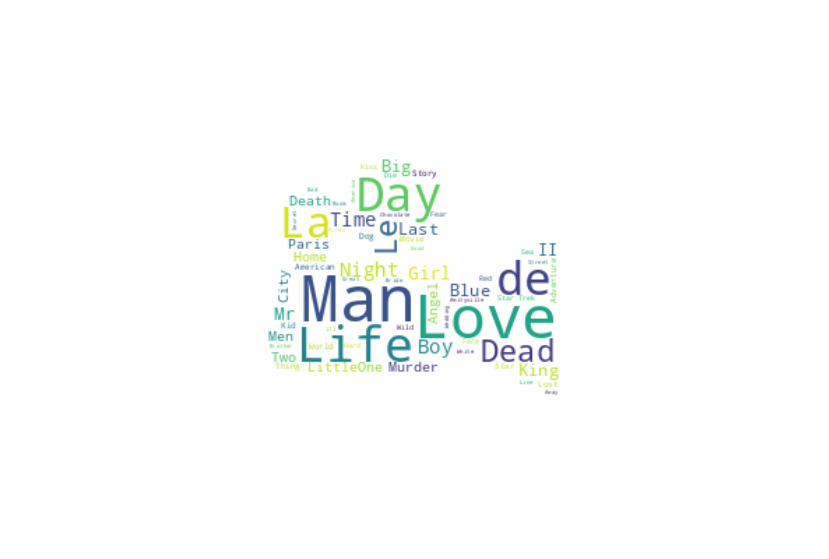

In [17]:
x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
movie_mask = np.array(Image.open("movie.jpg"))
wc = WordCloud(background_color="white", repeat=False, mask=movie_mask)
wc.generate(corpus)

plt.figure(figsize=(15, 7))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

## Preparing for Model

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [20]:
user_x_train = (train.user_id).to_numpy()
movie_x_train = (train.item_id).to_numpy()
y_train = (train.rating / 5).to_numpy()

user_x_test = (test.user_id).to_numpy()
movie_x_test = (test.item_id).to_numpy()
y_test = (test.rating / 5).to_numpy()

In [21]:
user_ids = dataset.user_id.unique()
movie_ids = dataset.item_id.unique()

In [22]:
print(f"total users: {len(user_ids)}, total movies: {len(movie_ids)}")

total users: 943, total movies: 1682


In [23]:
user_ids = user_ids.astype(int)
movie_ids = movie_ids.astype(int)

## Train-Test Split

## Creating Model

In [24]:
user_layer = tf.keras.layers.Input((1,), name="User_Inputs")
movie_layer = tf.keras.layers.Input((1,), name="Movie_Inputs")

user_embedding = tf.keras.layers.Embedding(max(user_ids) + 1, 50, name="User_Embeddings")(user_layer)

movie_embedding = tf.keras.layers.Embedding(max(movie_ids) + 1, 50, name="Movie_Embeddings")(movie_layer)

movie_user_dot = tf.keras.layers.Dot(2, name="Dot_Product")([user_embedding, movie_embedding])

output = tf.nn.sigmoid(movie_user_dot, name="Sigmoid_Layer")

In [25]:
model = tf.keras.Model([user_layer, movie_layer], output)

In [26]:
model.compile("Adam", "binary_crossentropy")

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
User_Inputs (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
Movie_Inputs (InputLayer)       [(None, 1)]          0                                            
__________________________________________________________________________________________________
User_Embeddings (Embedding)     (None, 1, 50)        47200       User_Inputs[0][0]                
__________________________________________________________________________________________________
Movie_Embeddings (Embedding)    (None, 1, 50)        84150       Movie_Inputs[0][0]               
______________________________________________________________________________________________

In [42]:
model.predict([np.array([1]), np.array([4])])

In [29]:
user_x_train = user_x_train.reshape((-1, 1))
movie_x_train = movie_x_train.reshape((-1, 1))
y_train = y_train.reshape((-1, 1))

In [30]:
model.predict([user_x_train[:2], movie_x_train[:2]])

array([[[0.4989764 ]],

       [[0.49858803]]], dtype=float32)

## Train, Save and Testing

In [31]:
model.fit([user_x_train, movie_x_train], y_train, batch_size=64, epochs=5,
          validation_data=([user_x_test, movie_x_test], y_test))

Epoch 1/5
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6508 - val_loss: 0.5821
Epoch 2/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.5704 - val_loss: 0.5694
Epoch 3/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.5598 - val_loss: 0.5666
Epoch 4/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.5522 - val_loss: 0.5651
Epoch 5/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.5446 - val_loss: 0.5643


In [32]:
model.save("model.h5")

In [33]:
user_id = 500
scores = []
for movie in tqdm(movie_ids):
    scores.append(model.predict([np.array([[user_id]]), np.array([[movie]])])[0][0][0])

100%|██████████| 1682/1682 [01:08<00:00, 24.48it/s]


In [34]:
scores

[0.79614943,
 0.83305055,
 0.39509785,
 0.6476438,
 0.75457376,
 0.8883395,
 0.6269023,
 0.5858576,
 0.54121023,
 0.7711845,
 0.66900647,
 0.59403163,
 0.66775835,
 0.51341164,
 0.47838312,
 0.557488,
 0.6705778,
 0.5831487,
 0.6636366,
 0.5687486,
 0.49716514,
 0.71604633,
 0.7183767,
 0.5671773,
 0.70764995,
 0.5813947,
 0.6566849,
 0.5297167,
 0.70249844,
 0.71996844,
 0.8258205,
 0.79595363,
 0.7705531,
 0.63334787,
 0.8067558,
 0.5765415,
 0.8763139,
 0.508692,
 0.7935601,
 0.69712216,
 0.4904478,
 0.6486442,
 0.45694888,
 0.71184534,
 0.701422,
 0.8311824,
 0.6309497,
 0.7264306,
 0.5546819,
 0.8983085,
 0.7667931,
 0.50892925,
 0.71594006,
 0.7285934,
 0.5985812,
 0.5286272,
 0.6115312,
 0.7592276,
 0.8272549,
 0.7468231,
 0.6211085,
 0.60304874,
 0.74568367,
 0.7329783,
 0.6993843,
 0.5449569,
 0.84362,
 0.8527323,
 0.6116438,
 0.45652756,
 0.6849653,
 0.8270582,
 0.56793946,
 0.70293516,
 0.47412252,
 0.53193396,
 0.53669655,
 0.6707728,
 0.8570503,
 0.6039741,
 0.5291434,
 0.

In [35]:
results = movie_ids[np.argsort(np.array(scores) * -1)]

In [36]:
results

array([127, 134, 100, ..., 398, 438, 437])

In [37]:
for i in range(10):
    print(movie_info_dataset[movie_info_dataset["movie id"] == results[i]]["movie title"].values[0])

Godfather, The (1972)
Citizen Kane (1941)
Fargo (1996)
Chinatown (1974)
Wrong Trousers, The (1993)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
Star Wars (1977)
Rear Window (1954)
Close Shave, A (1995)
Usual Suspects, The (1995)


## Hyperparameter Tuning

- Prepare a function to build and return a model
- Add keras-tuner hyperparameters object into it
- Create a Hyberband hyperparameter optimizer
- Start searhing and get the best model
- Train again

In [38]:
from keras_tuner import HyperParameters, Hyperband, Objective


def build_model(hp: HyperParameters):
    embedding_size = hp.Int(name='Embedding', min_value=40, max_value=125)
    learning_rate = hp.Float('learning_rate', 1e-6, 1e-2, sampling='log')
    
    user_layer = tf.keras.layers.Input((1,))
    movie_layer = tf.keras.layers.Input((1,))

    user_embedding = tf.keras.layers.Embedding(max(user_ids) + 1, embedding_size)(user_layer)

    movie_embedding = tf.keras.layers.Embedding(max(movie_ids) + 1, embedding_size)(movie_layer)

    movie_user_dot = tf.keras.layers.Dot(2)([user_embedding, movie_embedding])

    output = tf.nn.sigmoid(movie_user_dot)

    model = tf.keras.Model([user_layer, movie_layer], output)
    model.compile(tf.keras.optimizers.Adam(learning_rate=learning_rate), "binary_crossentropy")

    return model

In [39]:
tuner = Hyperband(
    build_model,
    objective=Objective('val_loss', 'min'),
    max_epochs=10,
    directory='tuning_results',
    project_name='movie_recommendation'
)

INFO:tensorflow:Reloading Oracle from existing project tuning_results/movie_recommendation/oracle.json
INFO:tensorflow:Reloading Tuner from tuning_results/movie_recommendation/tuner0.json


In [48]:
tuner.search([user_x_train, movie_x_train], y_train, batch_size=64,
          validation_data=([user_x_test, movie_x_test], y_test))

Trial 14 Complete [00h 00m 15s]
val_loss: 0.6921555399894714

Best val_loss So Far: 0.5647019743919373
Total elapsed time: 00h 02m 37s
INFO:tensorflow:Oracle triggered exit


In [49]:
# Get the optimal hyperparameters
best_hps: HyperParameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps.values)

{'Embedding': 69, 'learning_rate': 0.0024698159158054998, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '9750224812c4837e7184d93b05edded9'}


In [50]:
best_model:tf.keras.Model = tuner.get_best_models(1)[0]
best_model.evaluate([user_x_test, movie_x_test], y_test)
best_model.save('recommender_model')

625/625 [==============================] - 1s 2ms/step - loss: 0.5647
INFO:tensorflow:Assets written to: recommender_model/assets
